# Pre-analysis of the BlueGene/L dataset 
This notebook uses data mining techniques to help better understand the data

### About the dataset

BGL is an open dataset of logs collected from a BlueGene/L supercomputer system at Lawrence Livermore National Labs (LLNL) in Livermore, California, with 131,072 processors and 32,768GB memory. The log contains alert and non-alert messages identified by alert category tags. In the first column of the log, "-" indicates non-alert messages while others are alert messages. The label information is amenable to alert detection and prediction research. It has been used in several studies on log parsing, anomaly detection, and failure prediction.

### Structure of log

Logs are structure following the format "LABEL TIMESTAMP DATE NODE DATE-FULL NODE(again) TYPE COMPONENT LEVEL CONTENT". For example:

"- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected"

In [1]:
# dependencies
import sys
from pathlib import Path

ROOT = Path().resolve().parents[0]
sys.path.append(str(ROOT))

from utils.bgl_parser import parse_bgl_dataset

import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

/home/paulofr/miniforge3/envs/MLP-Final/lib/python3.11/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
# parsing and importing dataset
df = parse_bgl_dataset('../data/BGL.log')
df.head()

,Label,Timestamp,Node,Type,Component,Level,Content,Datetime
0,-,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,2005-06-03 22:42:50
1,-,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,2005-06-03 22:42:50
2,-,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,2005-06-03 22:42:50
3,-,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,2005-06-03 22:42:50
4,-,1117838570,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,2005-06-03 22:42:50


                                             |          | [  0%]   00:00 -> (? left)


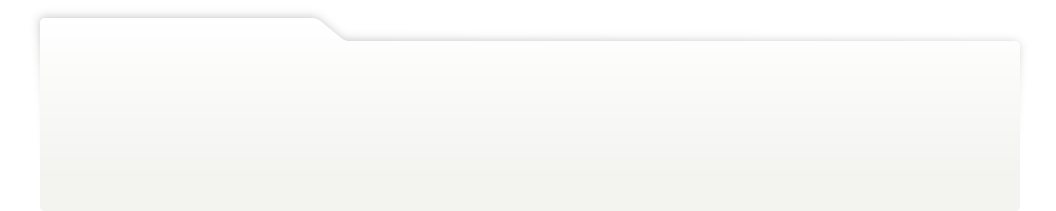
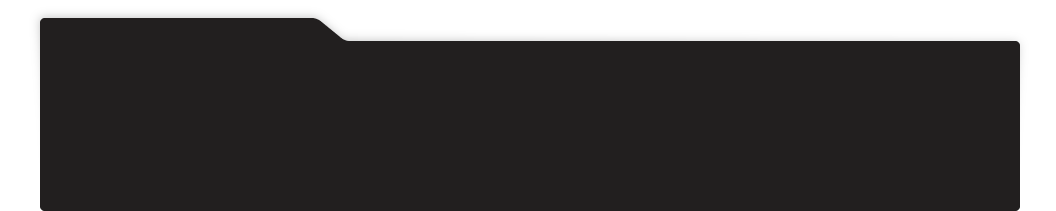
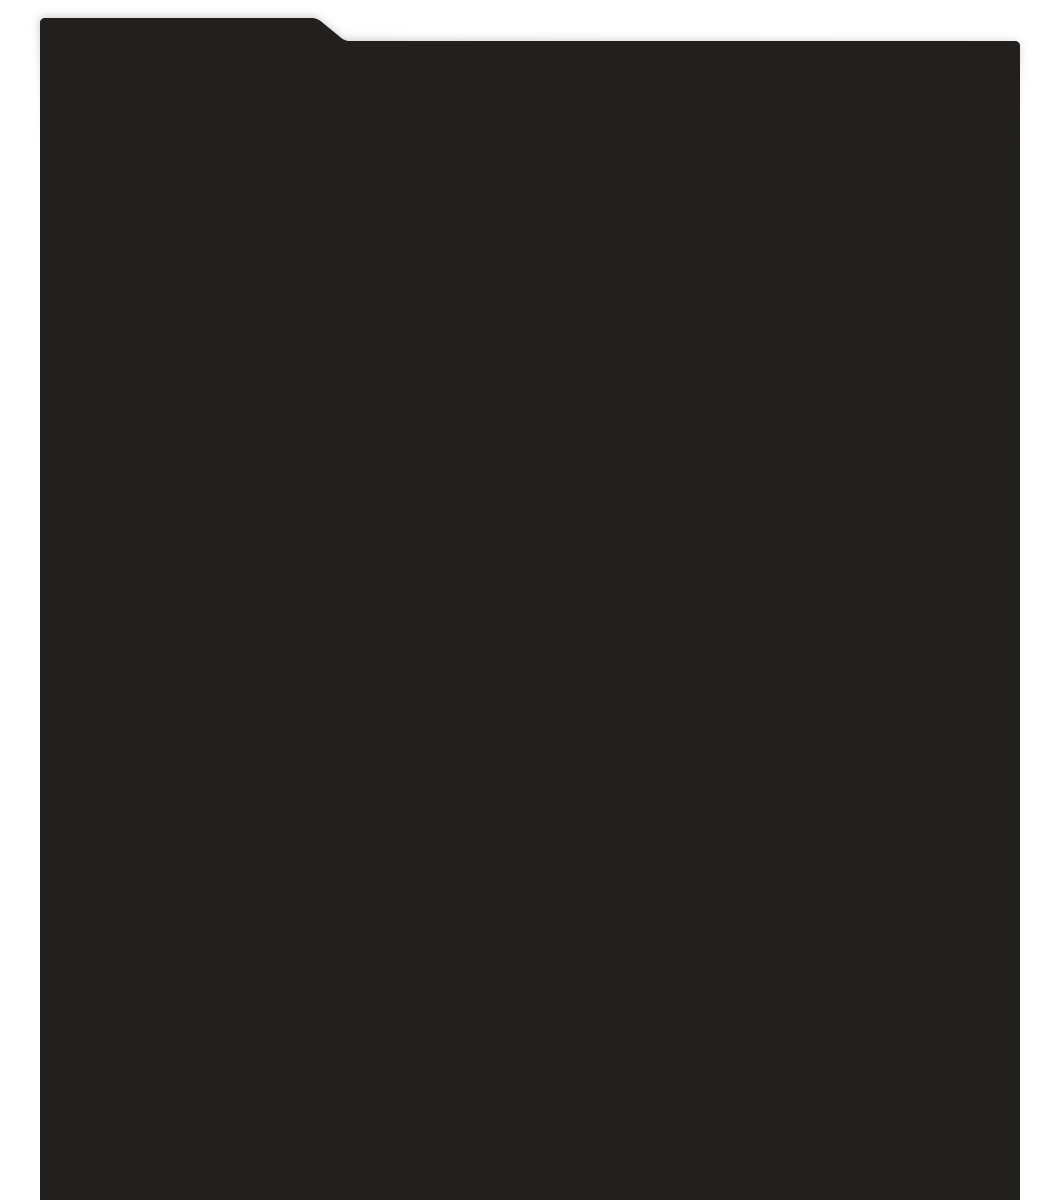
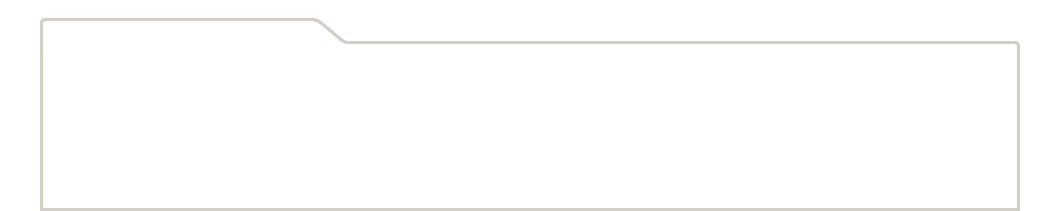
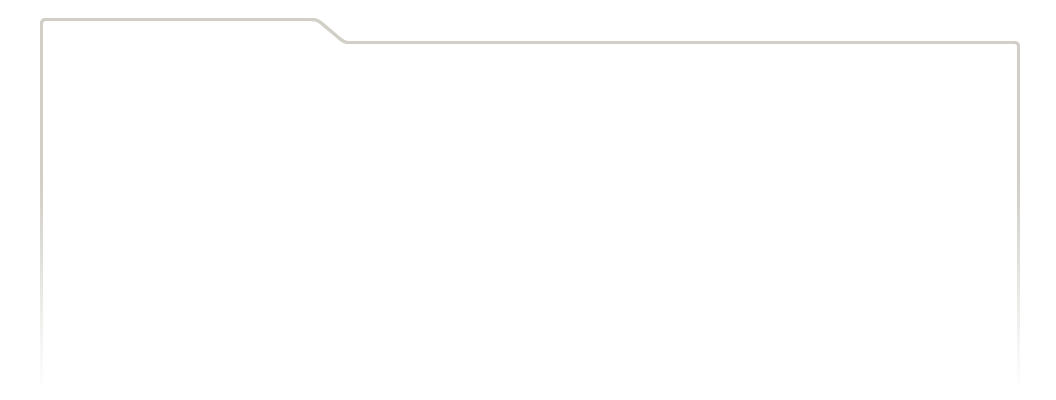
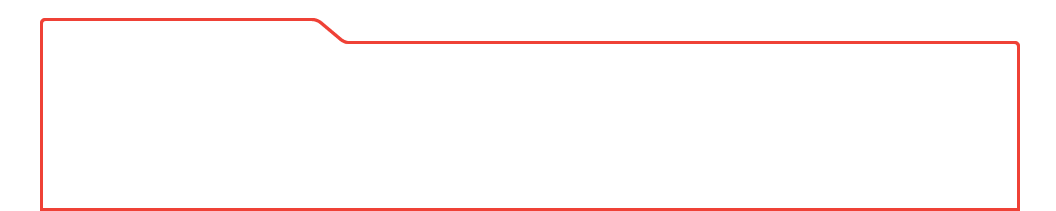
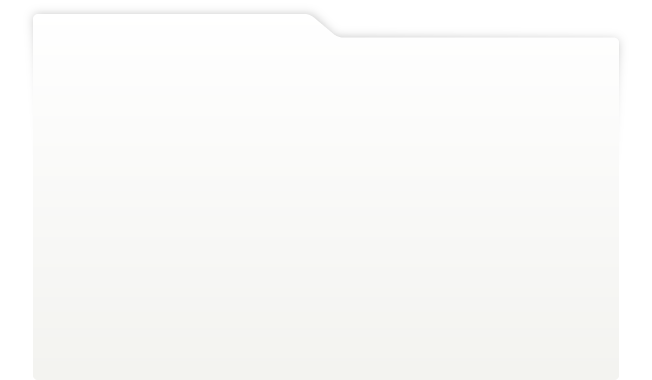
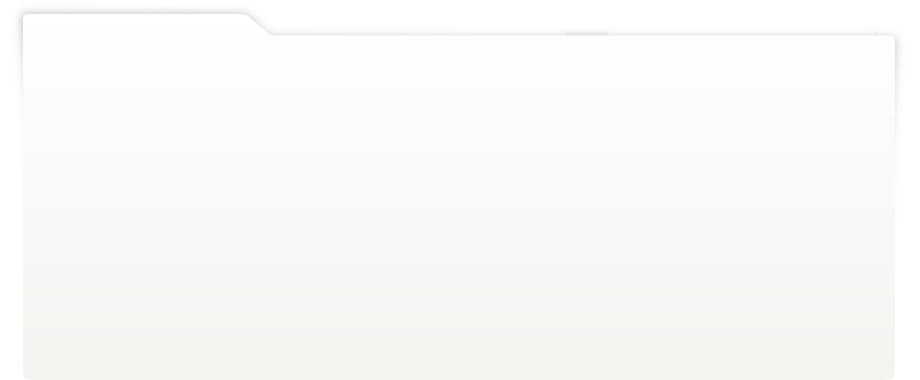
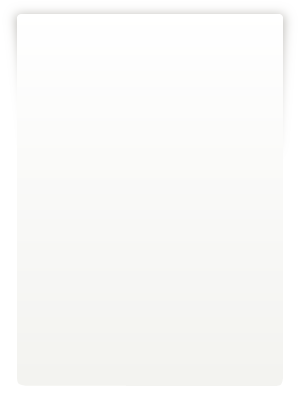
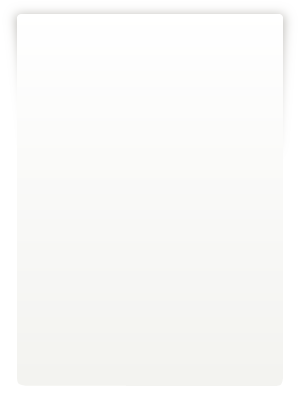
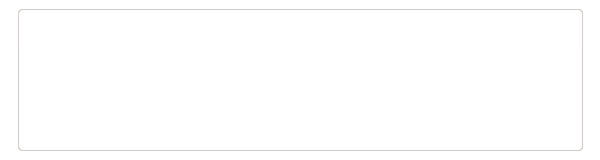
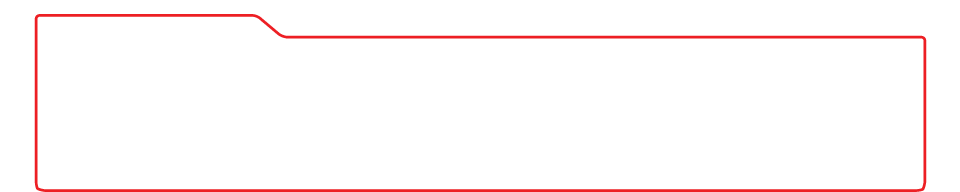
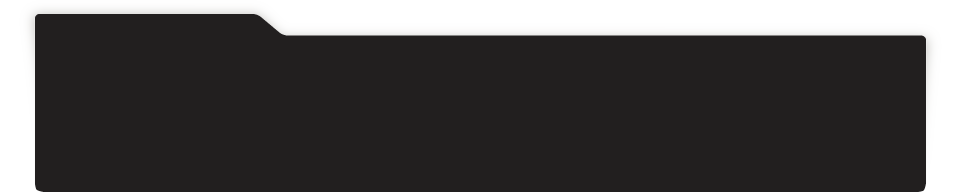
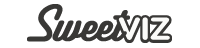
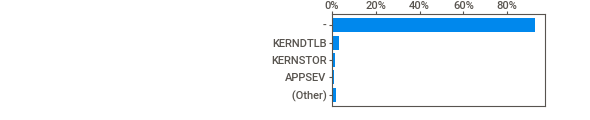
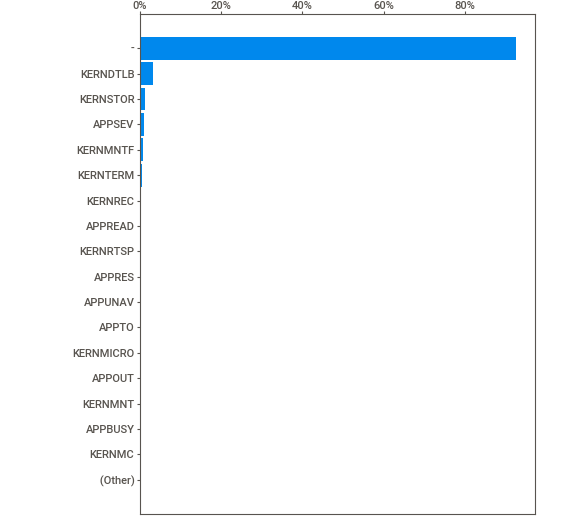
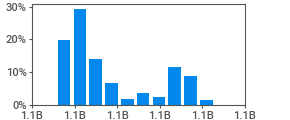
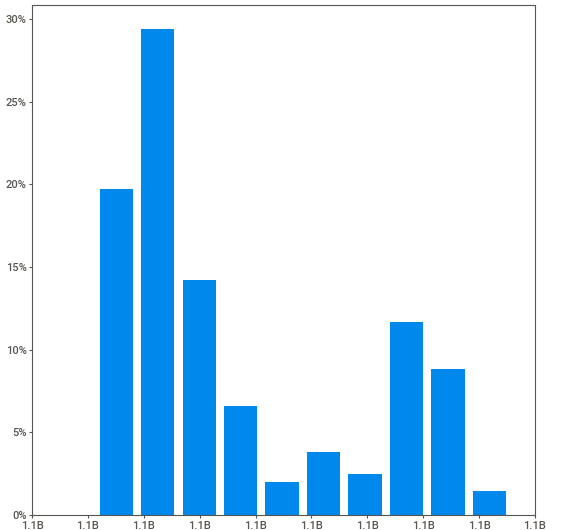
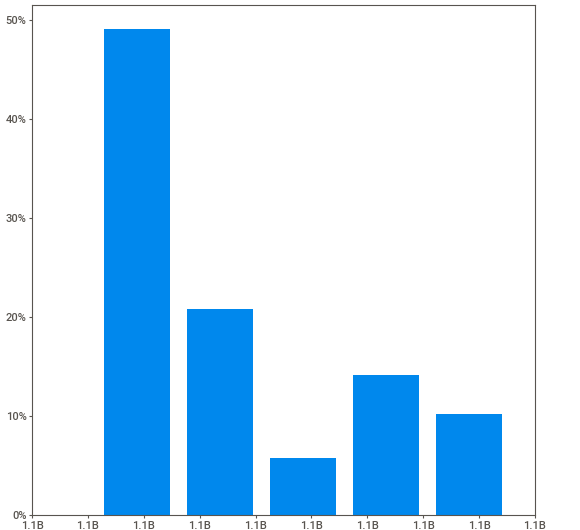
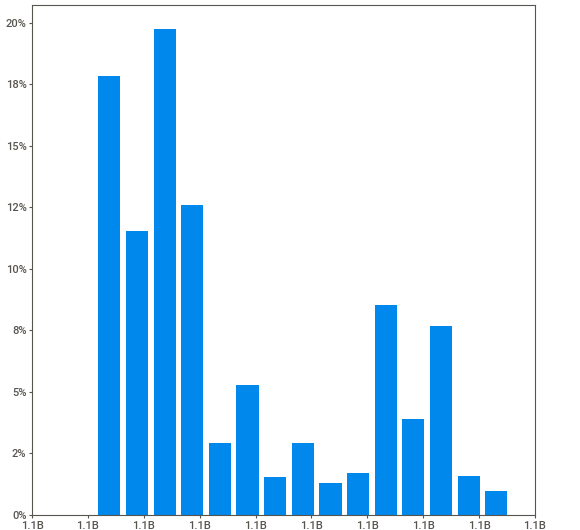
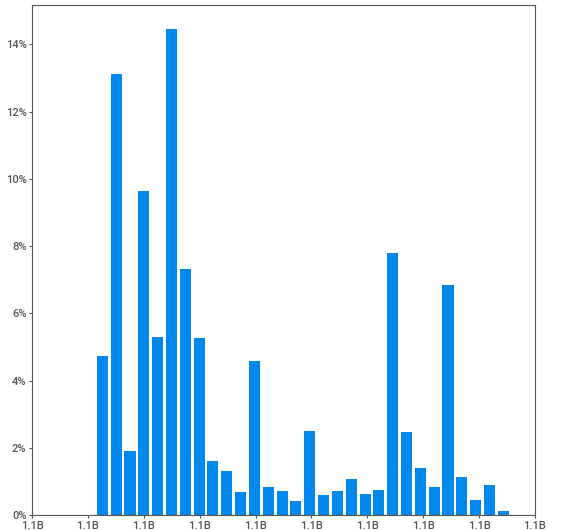
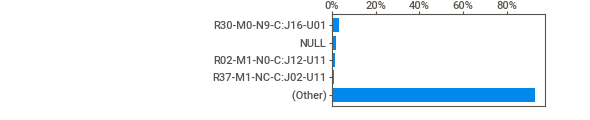
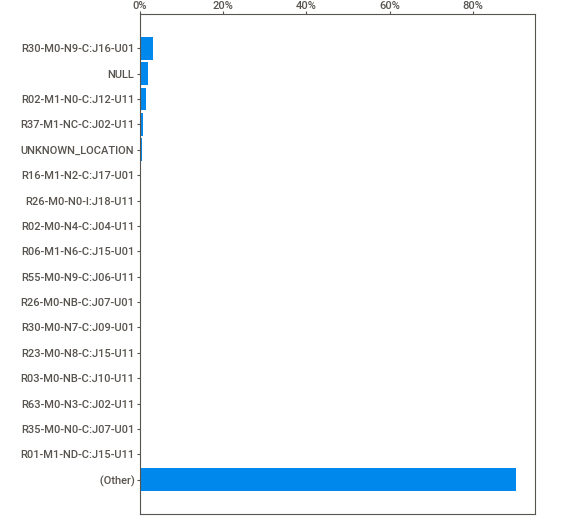
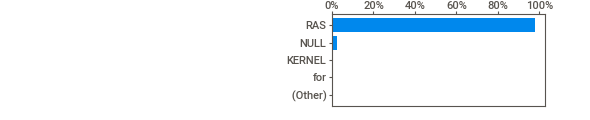
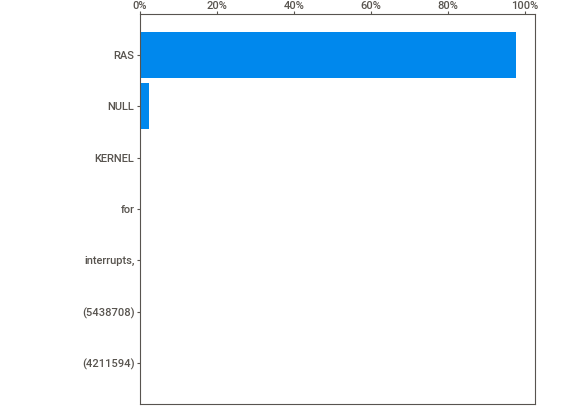
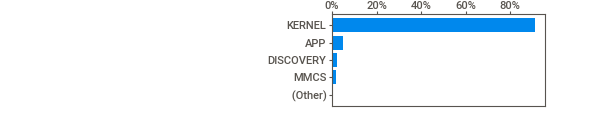
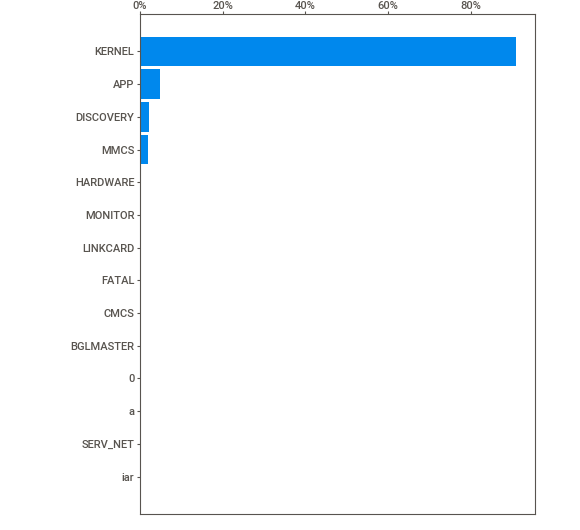
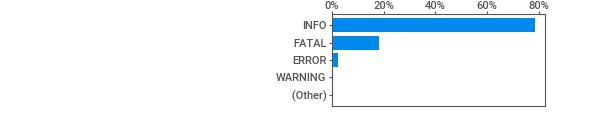
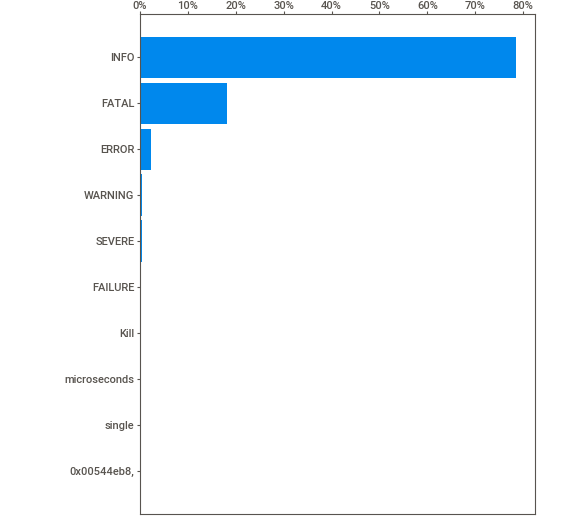
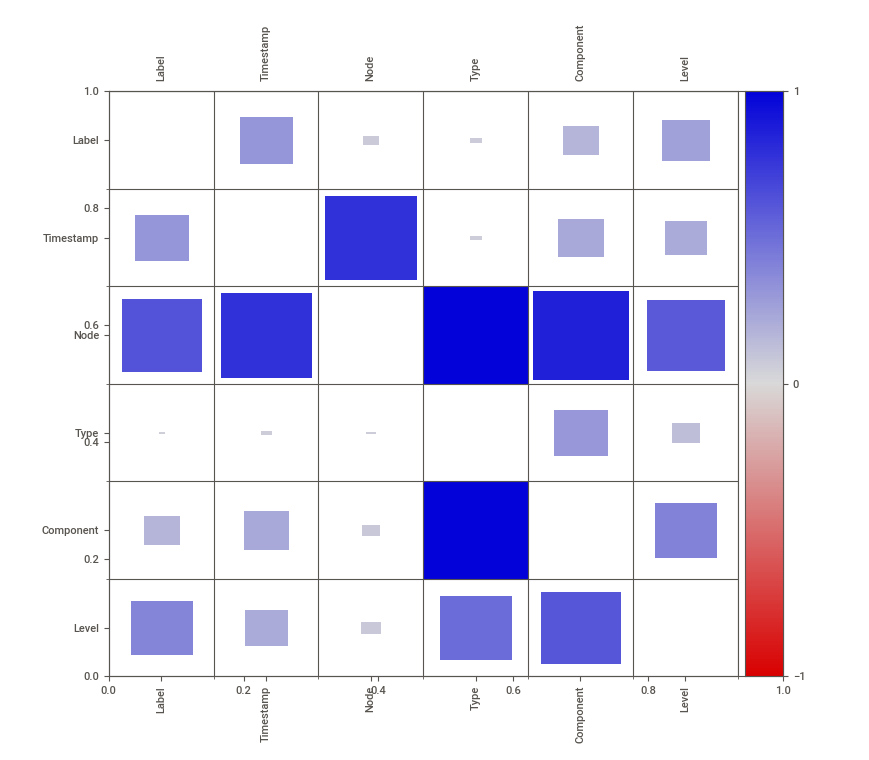
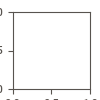

In [3]:
# show general report on dataset
sv.analyze(df).show_notebook()

## Understanding Features
Labels tell what the type of the event that geterated the log. Most of the logs have a "-" in the label, meaning there was not problem identified in that log. According to the article "What Supercomputers Say: A Study of Five System Logs
" (https://ieeexplore.ieee.org/document/4273008), the types can be split in the following categories:

![labels](../images/labels.png) 


In [4]:
df['Label'].value_counts()

-            4365033
KERNDTLB      152734
KERNSTOR       63491
APPSEV         49651
KERNMNTF       31531
KERNTERM       23338
KERNREC         6145
APPREAD         5983
KERNRTSP        3983
APPRES          2370
APPUNAV         2048
APPTO           1991
KERNMICRO       1503
APPOUT           816
KERNMNT          720
APPBUSY          512
KERNMC           342
APPCHILD         320
KERNSOCK         209
KERNPOW          192
LINKIAP          166
APPALLOC         144
KERNSERV          94
MASABNORM         37
LINKDISC          24
KERNPAN           18
KERNCON           16
LINKPAP           14
KERNNOETH         14
MONPOW            12
MASNORM           10
APPTORUS          10
KERNPROG           5
MMCS               3
KERNRTSA           3
KERNFLOAT          3
MONNULL            2
LINKBLL            2
KERNBIT            1
KERNEXT            1
MONILL             1
KERNTLBE           1
Name: Label, dtype: int64

Similar to labels, we have level which can tell us the gravity of the report of the log. It can go from just an INFO log to a failure or kill

![levels](../images/levels.png) 

In [5]:
df['Level'].value_counts()

INFO            3701880
FATAL            854658
ERROR            112355
WARNING           23357
SEVERE            19213
FAILURE            1714
Kill                306
microseconds          4
single                4
0x00544eb8,           2
Name: Level, dtype: int64